
# Prática 6

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**


Nesta prática vamos comparar o Método Theta com o Método de Holt, visto na Aula 2, para previsões dos 30 próximos dias para os dados VALE3. Repita com janelas menores como 20 ou 10 dias.

**1. Carregue os pacotes que serão utilizados e faça a leitura dos dados, completando os dados faltantes como visto em aula.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure",figsize=(12,6))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("darkgrid")

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

**2. Carregue as bibliotecas e faça a leitura dos dados VALE3. Utilizaremos a variável Close.**

In [3]:
pkgdir = 'dados'
# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'

df = pd.read_csv(f'{pkgdir}/VALE3.csv', index_col=0, parse_dates=True)

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
df = df.reindex(idx)

df.fillna(method='ffill', inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [4]:
df.index

DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', length=261, freq='B')

**3. Faça um gráfico da série.**

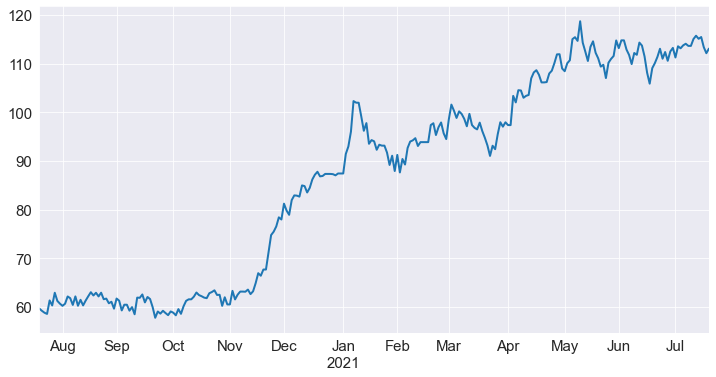

In [5]:
df['Close'].plot();

**4. Defina bases de treino e teste, deixando 30 observações para a base de teste.**

In [6]:
len(df)

261

In [7]:
treino = df.iloc[:231]
teste = df.iloc[231:]
# treino = df.iloc[:-30]
# teste = df.iloc[-30:]

**5. Faça uma decomposição da série em tendência, sazonalidade e resíduos. Qual o período de sazonalidade mais adequado?**

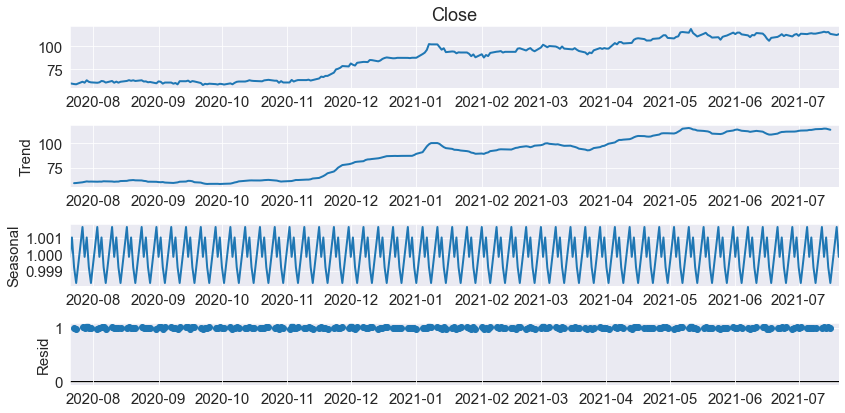

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(df['Close'], model='multiplicative', period=5)
result.plot()

pyplot.show();

**6. Obtenha as previsões pelo Método Theta.**

In [11]:
from statsmodels.tsa.forecasting.theta import ThetaModel
tm = ThetaModel(treino['Close'])
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  Close   No. Observations:                  231
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Tue, 24 Aug 2021   Deseas. Method:         Multiplicative
Time:                        16:54:02   Period:                              5
Sample:                    07-21-2020                                         
                         - 06-08-2021                                         
   Parameter Estimates   
           Parameters    
-------------------------
b0    0.27978560620158865
alpha  0.9204099298924648
-------------------------


In [13]:
res = ThetaModel(treino['Close'],deseasonalize=True,period=5).fit()
fcast = res.forecast(30)

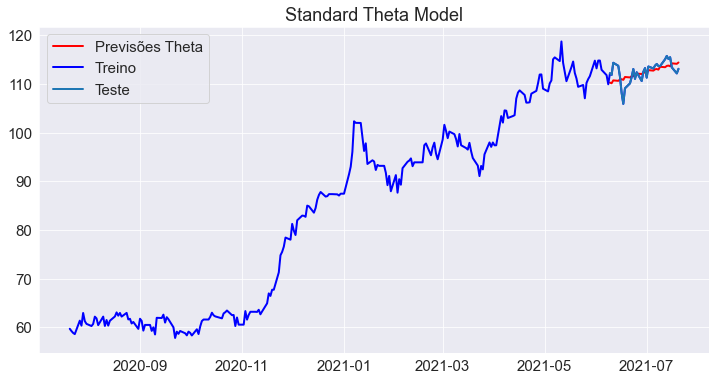

In [16]:
plt.figure(figsize = (12,6))

plt.plot(fcast,  color = 'red', label = 'Previsões Theta')
plt.plot(df['Close'],color = 'blue', label = 'Treino')
plt.plot(teste['Close'], label='Teste')
            
plt.title('Standard Theta Model')
plt.legend()
plt.show();

**7. Aplique o Método de Holt para os dados de teste e preveja as próximas 30 observações.**

In [17]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

ajustado_H = ExponentialSmoothing(treino['Close'],trend='add').fit()  
predito_H = ajustado_H.forecast(30).rename('Previsão Holt')
# df['Holt'] = ajustado.fittedvalues.shift(-1)
predito_H.index = df.index[231:]

**8. Represente graficamente os resultados, com as bases de treino e teste.**

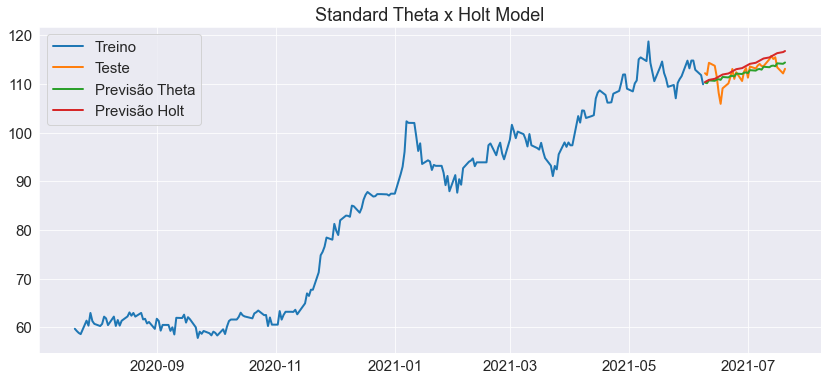

In [18]:
plt.figure(figsize = (14,6))

plt.plot(treino['Close'], label='Treino')
plt.plot(teste['Close'], label='Teste')
plt.plot(fcast, label='Previsão Theta')
plt.plot(predito_H, label='Previsão Holt')

plt.title('Standard Theta x Holt Model')
plt.legend()
plt.show();

**9. Utilize o EQM para comparar as previsões. Qual o melhor método?**

In [19]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['Close'], fcast)
print(f'EQM Theta: {error:11.10}')


error = mean_squared_error(teste['Close'], predito_H)
print(f'EQM Holt: {error:11.10}')

EQM Theta: 3.211730941
EQM Holt:  5.00802345


**11. Repita os procedimentos para obter previsões para dados futuros, ou seja, utilizando todos os dados disponíveis e fazendo previsões para os próximos 20 dias.**

In [20]:
# Método Theta

from statsmodels.tsa.forecasting.theta import ThetaModel

res = ThetaModel(df['Close'],deseasonalize=True,period=5).fit()
fcast = res.forecast(20)

In [21]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

modelo_H =  ExponentialSmoothing(df['Close'], trend='add');
 
ajustado = modelo_H.fit();

df['Holt'] = ajustado.fittedvalues.shift(-1);

predito_H = ajustado.forecast(20).rename('Previsão Holt')

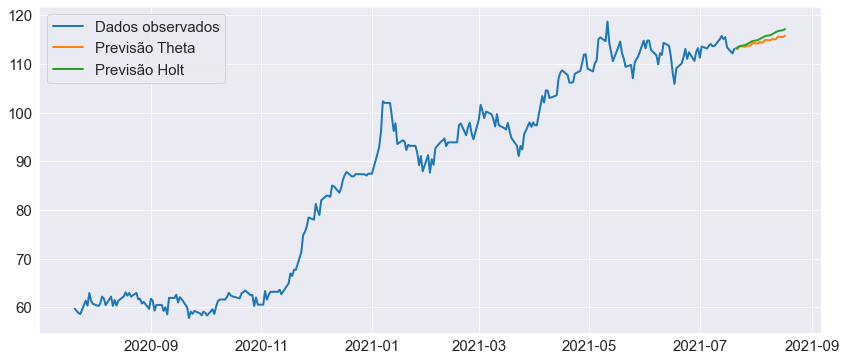

In [22]:
plt.figure(figsize = (14,6))


plt.plot(df['Close'], label='Dados observados')
plt.plot(fcast, label='Previsão Theta')
plt.plot(predito_H, label='Previsão Holt')

plt.legend()
plt.show()


**11. Retorne e mude o tamanho das bases de treino e teste, para por exemplo 10 ou 20 observações na amostra de teste. Os resultados são similares?**